In [22]:
#Basics import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings 

In [23]:
#import data in form of dataframe
df=pd.read_csv("data/stud.csv")

In [24]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


preparing X and Y variable

In [25]:
x=df.drop(columns=['math_score'],axis=1)

In [26]:
y=df['math_score']

In [27]:
#create column transformer with 3 types of transformer
num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [28]:
x = preprocessor.fit_transform(x)

In [29]:
x.shape

(1000, 19)

In [30]:
#separate dataset into train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape


((800, 19), (200, 19))

Create an Evaluate Function to give all metrics after model training

In [38]:
def evaluated_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square

In [41]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regreesor": AdaBoostRegressor()
    }
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)

    #make prediction
    y_train_pred  = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    #evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2  = evaluated_model(y_train,y_train_pred)

    model_test_mae , model_test_rmse , model_test_r2 = evaluated_model(y_test,y_test_pred)



    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('model performance for training set')
    print("- root mean squared error: {:.4f}".format(model_train_rmse))
    print("- mean absolute error: {:.4f}".format(model_train_mae))
    print("-r2 score:{:.4f}".format(model_train_r2))

    print('----------------------------------------')


    print('model performance for test set')
    print("- root mean squared error: {:.4f}".format(model_test_rmse))
    print("- mean absolute error: {:.4f}".format(model_test_mae))
    print("-r2 score:{:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')



LinearRegression
model performance for training set
- root mean squared error: 5.3231
- mean absolute error: 4.2667
-r2 score:0.8743
----------------------------------------
model performance for test set
- root mean squared error: 5.3940
- mean absolute error: 4.2148
-r2 score:0.8804


Lasso
model performance for training set
- root mean squared error: 6.5938
- mean absolute error: 5.2063
-r2 score:0.8071
----------------------------------------
model performance for test set
- root mean squared error: 6.5197
- mean absolute error: 5.1579
-r2 score:0.8253


Ridge
model performance for training set
- root mean squared error: 5.3233
- mean absolute error: 4.2650
-r2 score:0.8743
----------------------------------------
model performance for test set
- root mean squared error: 5.3904
- mean absolute error: 4.2111
-r2 score:0.8806


K-Neighbors Regressor
model performance for training set
- root mean squared error: 5.7092
- mean absolute error: 4.5180
-r2 score:0.8554
--------------------

In [42]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['model name','r2_score']).sort_values(by=["r2_score"],ascending=False)

,model name,r2_score
2,Ridge,0.880593
0,LinearRegression,0.880433
8,AdaBoost Regreesor,0.857093
5,Random Forest Regressor,0.854924
7,CatBoosting Regressor,0.851632
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783898
4,Decision Tree,0.753841


Linear Regression

In [45]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train,y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print("accuracy of the model is %.2f"%score)

accuracy of the model is 88.04


plot y_pred and y_test

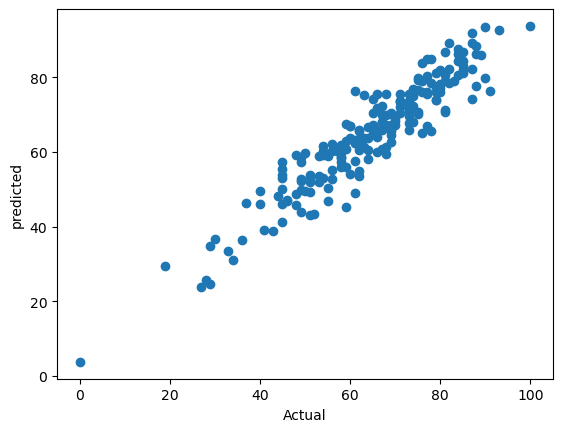

In [46]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('predicted');

In [49]:
pred_df=pd.DataFrame({'Actual value':y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual value,Predicted value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
